In [1]:
import pandas as pd
import shap
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# 1. Load credit card dataset
credit_df = pd.read_csv('../data/raw/creditcard.csv')

# 2. Separate features and target
X = credit_df.drop(columns=['Class'])
y = credit_df['Class']

# 3. Standardize features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

# 5. Train RandomForest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

100%|===================| 113768/113924 [09:50<00:00]        

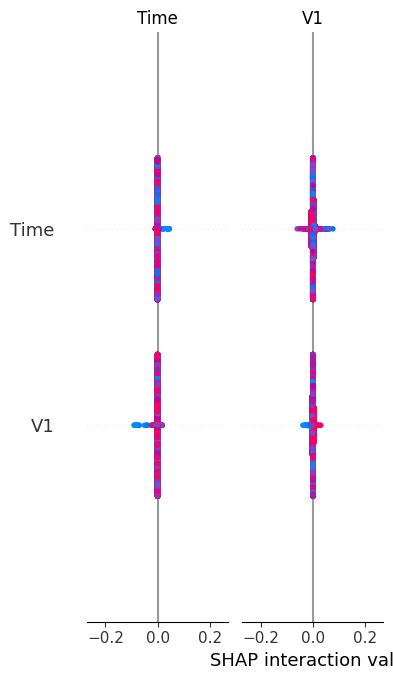

In [2]:
# 6. SHAP explanation
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# 7. Summary plot
shap.summary_plot(shap_values, X_test)
